In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg

class Image(object):
  def __init__(self, path):
    self.path=path
    self.bgr_img=None
    self.gray_image=None
    self.rgb_image=None

  def read_image(self,return_img=False):
    self.bgr_img=plt.imread(self.path)
    if return_img:
      return self.bgr_img

  def rgb(self,return_img=False):
    self.rgb_image=np.flip(self.bgr_img,axis=-1)
    if return_img:
      return self.rgb_image

  def gray(self, return_img=False):
    self.gray_image=cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2GRAY)
    if return_img:
      return self.gray_image

  def show(self,img,title='image'):
    plt.title(title)
    plt.imshow(img)


  def show_all(self,image_list,title_list):
    plt.figure(figsize=[20,10])
    assert len(image_list)== len(title_list),"Houston we've got a problem"
    N= len(image_list)
    for index,(img, title) in enumerate(zip(image_list,title_list)):
      plt.subplot(1,N,index+1)
      if len(img.shape) != 3:
        plt.imshow(img,cmap='gray')
      else :
        plt.imshow(img)
      plt.title(title)
    plt.show()

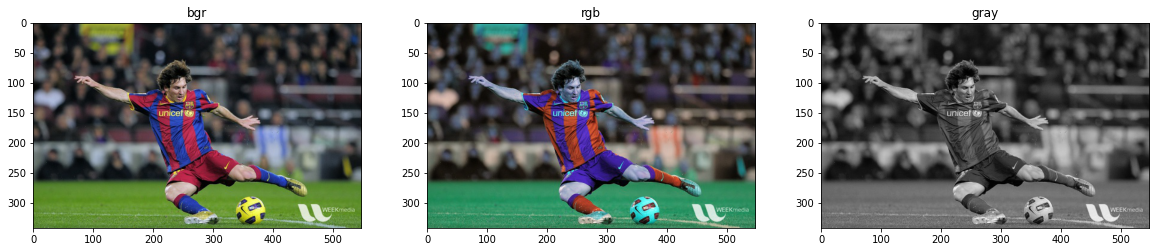

In [0]:
image=Image("/content/sample_data/messi.jpg")
bgr=image.read_image(return_img=True)
rgb=image.rgb(return_img=True)
gray=image.gray(return_img=True)
image.show_all([bgr, rgb, gray],["bgr","rgb",'gray'])


In [0]:
def conv_trans(image):
  row= image.shape[0]
  column= image.shape[1]
  image_copy= image.copy()
  for i in range(row):
    for j in range(column):
      image_copy[i][j]=image[row-1-i][column-1-j]
  return image_copy

def convolve2d(image, kernel):
  kernel1=conv_trans(kernel)
  row= image.shape[0]
  column= image.shape[1]
  k_row=kernel.shape[0]
  k_column=kernel.shape[1]
  h= kernel.shape[0]//2
  w= kernel.shape[1]//2
  conv_image=np.zeros(image.shape)
  for i in range(row):
    for j in range(column):
      sum=0
      for row_kernel in range(k_row):
        for column_kernel in range(k_column):
          #מניעת מכפלה כאשר האינדקסים הם שלילים או מעבר לגודל התמונה
          if i-h+row_kernel >= 0 and i-h+row_kernel < row and j-w+column_kernel >= 0 and j-w+column_kernel <column:
            sum+= image[i-h+row_kernel][j-w+column_kernel]*kernel1[row_kernel][column_kernel]
      conv_image[i][j]=sum
  return conv_image


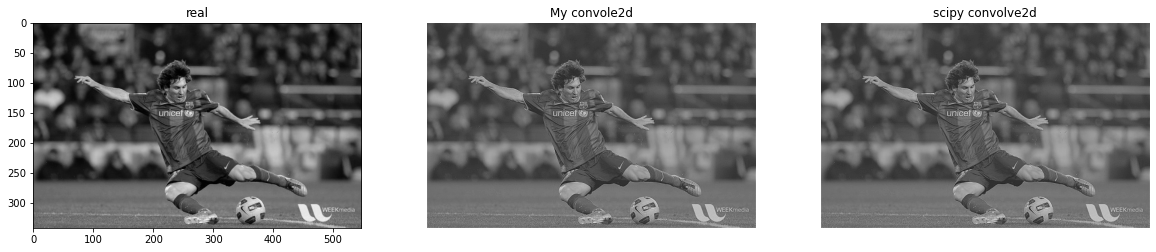

In [0]:
kernel = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4
image_equalized= gray/np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized,kernel)
plt.figure(figsize=[20, 10])
plt.subplot(1, 3, 1)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.title('real')
plt.subplot(1,3,2)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convole2d')
plt.axis('off')
myimage=image_kernel.copy()
import scipy.signal
image_kernel= scipy.signal.convolve2d(image_equalized,kernel,'same')
plt.subplot(1, 3, 3)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title("scipy convolve2d")
plt.axis('off')
plt.show()

#תשובה לבונוס
יש הרבה פלטרים שמבצים פעולות דומות למשל על ידי החלפת קרנל 


#Sobel Edge 

In [0]:
image1=Image("/content/sample_data/messi.jpg")
image1.read_image(return_img=False)
plt.figure(figsize=[60, 30])
#Image orginal
plt.subplot(2, 2, 1)
gray=image1.gray(return_img=True)
plt.imshow(gray,cmap=plt.cm.gray)
plt.title("Input")
plt.axis('off')
plt.subplot(2, 2, 2)
#sobel x edge
sobel_X=cv2.Sobel(gray,cv2.CV_64F,1,0,3,1)
sobel_X=np.absolute(sobel_X)
plt.imshow(sobel_X,cmap=plt.cm.gray)
plt.title("Sobel x opreation")
plt.axis('off')
#sobel y edge
plt.subplot(2, 2, 3)
sobel_y=cv2.Sobel(gray,cv2.CV_64F,0,1,3,1)
sobel_y=np.absolute(sobel_y)
plt.imshow(sobel_y,cmap=plt.cm.gray)
plt.title("Sobel y opreation")
plt.axis('off')
# sobel x and y edge
plt.subplot(2, 2, 4)
sobel_y_x=cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_X,2),1.0,cv2.pow(sobel_y,2),1.0,0))
sobel_y_x=np.absolute(sobel_y_x)
plt.imshow(sobel_y_x,cmap=plt.cm.gray)
plt.title("Sobel intensity")
plt.axis('off')
plt.show()

# Canny Edge 

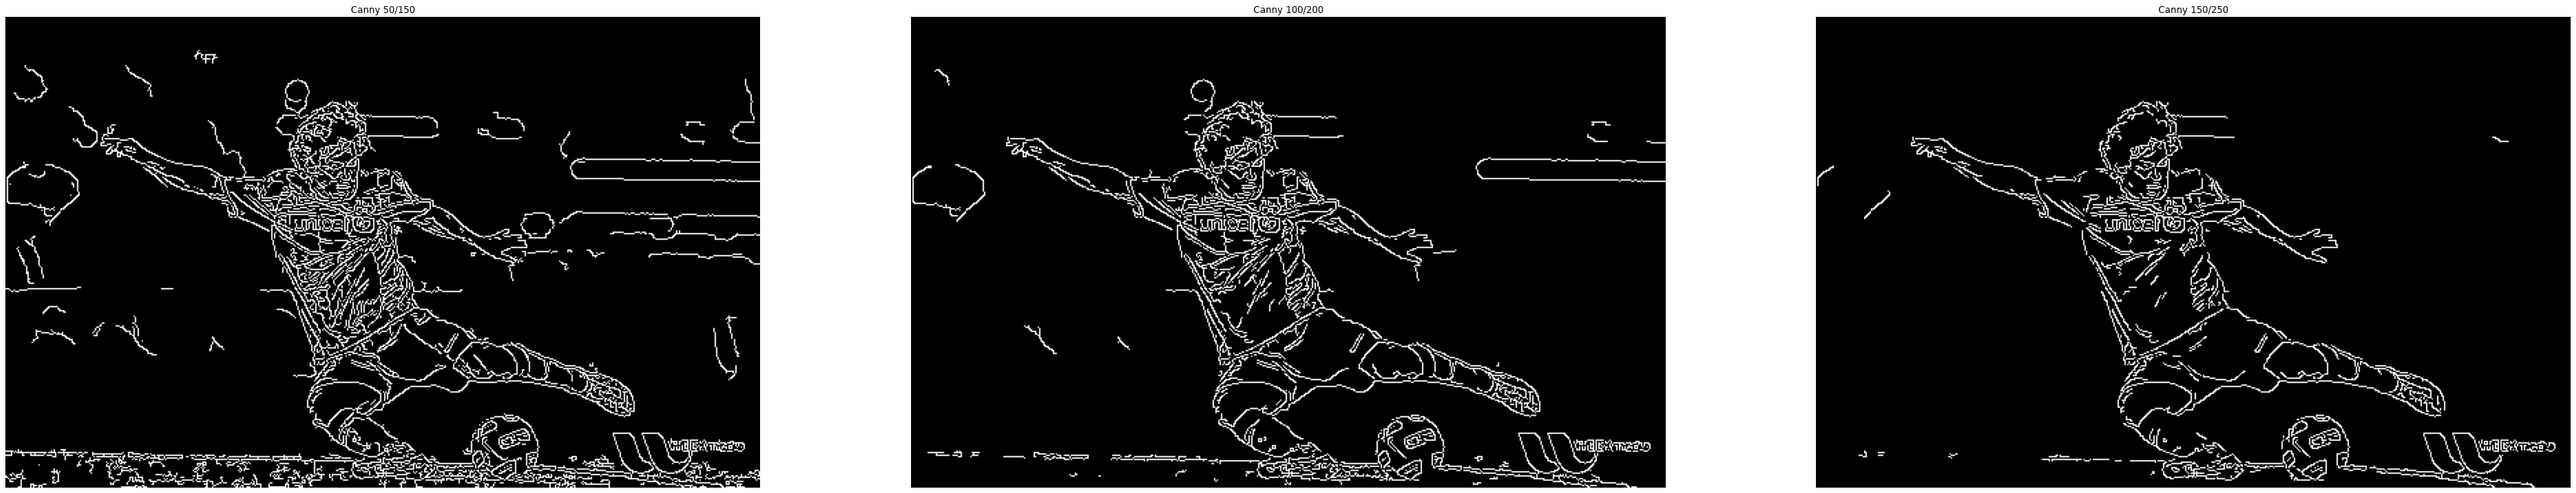

In [0]:
edge_50_150=cv2.Canny(gray,50,150,gray.size,apertureSize=3,L2gradient=False)
edge_100_200=cv2.Canny(gray,100,200,gray.size,apertureSize=3,L2gradient=False)
edge_150_250=cv2.Canny(gray,150,250,gray.size,apertureSize=3,L2gradient=False)
plt.figure(figsize=[60, 30])
plt.subplot(1,3,1)
plt.imshow(edge_50_150,cmap=plt.cm.gray)
plt.title("Canny 50/150")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(edge_100_200,cmap=plt.cm.gray)
plt.title("Canny 100/200")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(edge_150_250,cmap=plt.cm.gray)
plt.title("Canny 150/250")
plt.axis('off')
plt.show()


#Different 
threshold decide who is really edge with two number min and max threshold.<br/>
Edge with max val and above be sure edge and with min value and under not be edge <br/> 
If the edge between to min-max value so if connect to real edge is will be edge.<br/>
The first image take all edge that value with more 150 and second 200 third 250 , so the first image have many edge and after that the second.<br/>
</br>
The edge will be edge will be with 1 value and other will be 0 value. 


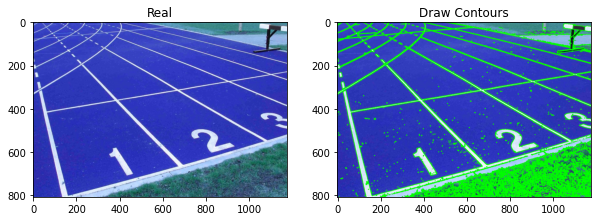

In [0]:
img= cv2.imread("/content/sample_data/track.jpg")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img1= cv2.Canny(img_gray,100, 150)
countor,_=cv2.findContours(img1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_draw=img.copy()
cv2.drawContours(img_draw,countor,-1,(0,255,0),2)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Real')
plt.subplot(1,2,2)
plt.imshow(img_draw)
plt.title('Draw Contours')
plt.show()